# alternate star sampling

Does changing where we pull stars from affect our conclusions?

In [1]:
import surp

import arya
import matplotlib.pyplot as plt

/astro/dboyea/.local/lib/python3.11/site-packages/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [18]:
from arya import COLORS
from surp import subgiants

In [14]:
data_kwargs = dict(
    color="k", 
    stat="median",
    err_kwargs=dict(facecolor="k", alpha=0.3)
)

model_kwargs = dict(
    stat="median", errorbar=None,
    aes="line"
)


def zooh_models(models, labels,x="MG_H", y="C_MG", use_true=True, sequential=False, filt_ha=True, **kwargs):
    kwargs = dict(numbins=20, **kwargs)
    
    N = len(models)
    
    if sequential:
        hm = arya.HueMap(clim=(0, N))
    else:
        hm = lambda i: COLORS[i]
    # end
        
    if use_true:
        xm=x + "_true"
        ym=y+ "_true"
    else:
        xm = x
        ym = y
    for i in range(N):
        name = labels[i]
        model = models[i]
        if filt_ha:
            df = surp.plots.filter_high_alpha(model)
        else:
            df = model
        color = hm(i)
            
        arya.medianplot(df, xm, ym, label=name, color=color, **model_kwargs, **kwargs)
    # end

    if filt_ha:
        df = surp.plots.filter_high_alpha(subgiants)
    else:
        df = subgiants
        
    arya.medianplot(df, x=x, y=y, zorder=-2, **data_kwargs, **kwargs)
    plt.xlabel(to_nice_name(x))
    plt.ylabel(to_nice_name(y))
    

# end


    
def zofeo_models(models, labels, x="MG_FE", y="C_MG", use_true=True, sequential=False, mg_0=-0.0, w=0.025, **kwargs):
    kwargs = dict(numbins=12, x=x, y=y, **kwargs)
    df = surp.plots.filter_metallicity(subgiants, c=mg_0, w=w)

    arya.medianplot(df, **data_kwargs, **kwargs)
    
    N = len(models)
    if use_true:
        kwargs["x"] = x + "_true"
        kwargs["y"] = y+ "_true"

    if sequential:
        hm = arya.HueMap(clim=(0, N))
    else:
        hm = lambda i: COLORS[i]
    # end    
    
    for i in range(N):
        model = models[i]
        df = surp.plots.filter_metallicity(model, c=mg_0, w=w)
        color = hm(i)

        arya.medianplot(df, label=labels[i], color=color, **model_kwargs, **kwargs)
    plt.xlabel(to_nice_name(x))
    plt.ylabel(to_nice_name(y))
    

#

In [15]:
def to_nice_name(apogee_name):
    name = apogee_name.replace("_", "/").title()
    name = f"[{name}]"
    return name

## Sampling

In [2]:
fiducial = surp.ViceModel.from_file("../../models/fiducial/run/model.json")

In [3]:
stars_unsampled = fiducial.stars_unsampled

In [4]:
stars_unsampled

,formation_time,zone_origin,zone_final,mass,abs_z,r_origin,r_final,FE_H,O_H,MG_H,...,N_MG,C_FE,C_O,C_MG,C_N,z,M_H,age,O_MG,high_alpha
0,0.00,0.0,3.0,0.0,0.0,0.05,0.35,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,NaN,False
1,0.00,1.0,0.0,0.0,0.0,0.15,0.05,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,NaN,False
2,0.00,2.0,0.0,0.0,0.0,0.25,0.05,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,NaN,False
3,0.00,3.0,49.0,0.0,0.0,0.35,4.95,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,NaN,False
4,0.00,4.0,0.0,0.0,0.0,0.45,0.05,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131995,13.18,195.0,195.0,0.0,0.0,19.55,19.55,16.314183,16.480986,16.480525,...,-0.249680,0.071424,-0.095378,-0.094918,0.154762,4.294993e+14,16.428842,0.00,0.000461,True
131996,13.18,196.0,196.0,0.0,0.0,19.65,19.65,16.268772,16.436780,16.436319,...,-0.252190,0.072764,-0.095244,-0.094784,0.157407,3.877705e+14,16.384455,0.00,0.000461,True
131997,13.18,197.0,197.0,0.0,0.0,19.75,19.75,16.217352,16.388577,16.388116,...,-0.254324,0.075160,-0.096066,-0.095605,0.158719,3.466123e+14,16.335724,0.00,0.000461,True
131998,13.18,198.0,198.0,0.0,0.0,19.85,19.85,15.909722,16.097242,16.096781,...,-0.272414,0.088158,-0.099362,-0.098901,0.173513,1.760849e+14,16.041602,0.00,0.000460,True


In [5]:
create_sample = surp.vice_utils.create_star_sample

In [6]:
cdf = surp.vice_utils.load_cdf()
cdf

,Unnamed: 0,R,cdf
0,0,0.00,0.0
1,1,0.01,0.0
2,2,0.02,0.0
3,3,0.03,0.0
4,4,0.04,0.0
...,...,...,...
1545,1545,15.45,1.0
1546,1546,15.46,1.0
1547,1547,15.47,1.0
1548,1548,15.48,1.0


In [7]:
cdf_low = cdf.copy()
cdf_low.R /= 1.5

In [8]:
cdf_high = cdf.copy()
cdf_high.R *= 1.5

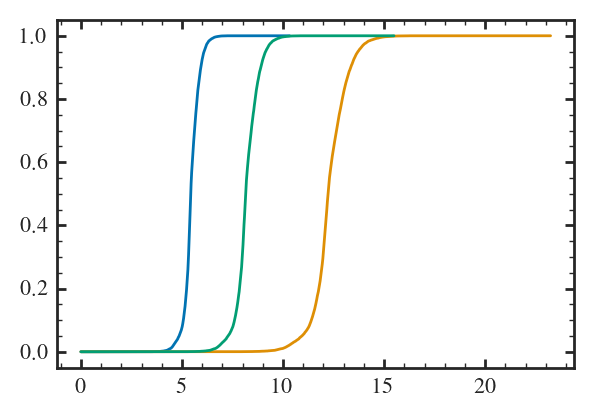

In [9]:
plt.plot(cdf_low.R, cdf_low.cdf)
plt.plot(cdf_high.R, cdf_high.cdf)
plt.plot(cdf.R, cdf.cdf)

In [14]:
samples = {}
samples["low"] = create_sample(stars_unsampled, cdf=cdf_low)
samples["fiducial"] = fiducial.stars

samples["high"] = create_sample(stars_unsampled, cdf=cdf_high)


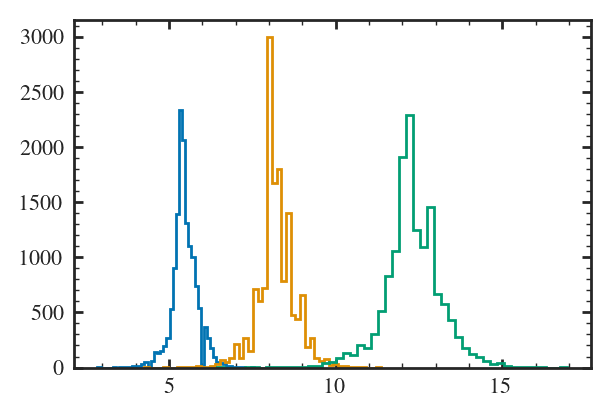

In [15]:
for name, sample in samples.items():
    plt.hist(sample.r_final, histtype="step")

In [17]:
samples.keys()

dict_keys(['low', 'fiducial', 'high'])

In [25]:
models = [v for k, v in samples.items()]
labels = [k for k, v in samples.items()]

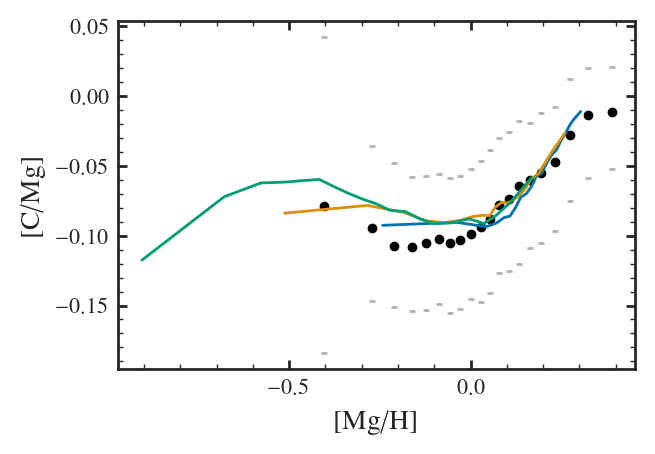

In [32]:
zooh_models(models, labels)

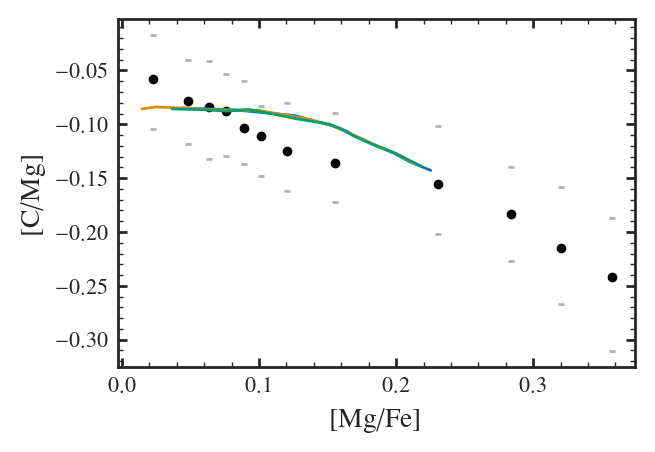

In [34]:
zofeo_models(models, labels)

In [35]:
cdf

,Unnamed: 0,R,cdf
0,0,0.00,0.0
1,1,0.01,0.0
2,2,0.02,0.0
3,3,0.03,0.0
4,4,0.04,0.0
...,...,...,...
1545,1545,15.45,1.0
1546,1546,15.46,1.0
1547,1547,15.47,1.0
1548,1548,15.48,1.0


In [10]:
import numpy as np
import pandas as pd

In [11]:
def make_uniform_cdf(low, high):
    def f(r):
        return np.where(r < low, 0, 
            np.where(r > high, 1,
            1 - (high - r) / (high - low) 
                    ))


    R = np.arange(0, 15.5, 0.01)
    cdf = f(R)

    return pd.DataFrame(dict(R=R, cdf=cdf))

In [13]:
samples = {}
samples["low"] = create_sample(stars_unsampled, cdf=make_uniform_cdf(3, 5))
samples["mid"] = create_sample(stars_unsampled, cdf=make_uniform_cdf(7, 9))
samples["high"] = create_sample(stars_unsampled, cdf=make_uniform_cdf(11, 13))


In [21]:
samples["wide"] = create_sample(stars_unsampled, cdf=make_uniform_cdf(4, 12))


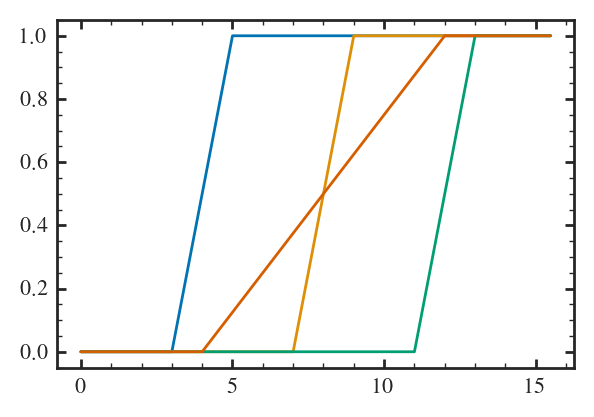

In [23]:
for low, high in [(3,5), (7,9), (11, 13), (4, 12)]:
    cdf = make_uniform_cdf(low, high)
    plt.plot(cdf.R, cdf.cdf)

In [24]:
models = [v for k, v in samples.items()]
labels = [k for k, v in samples.items()]

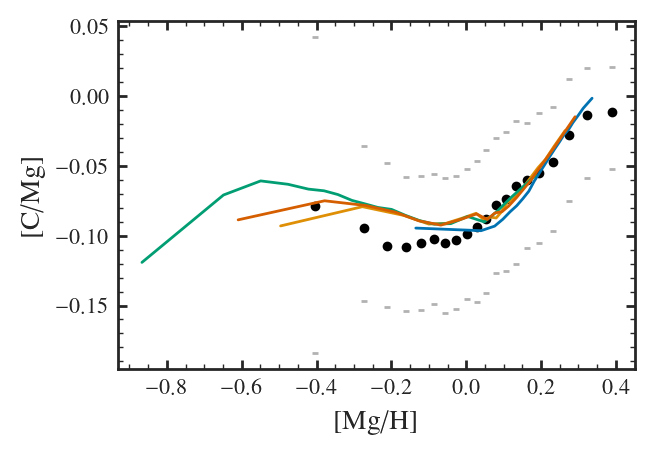

In [25]:
zooh_models(models, labels)

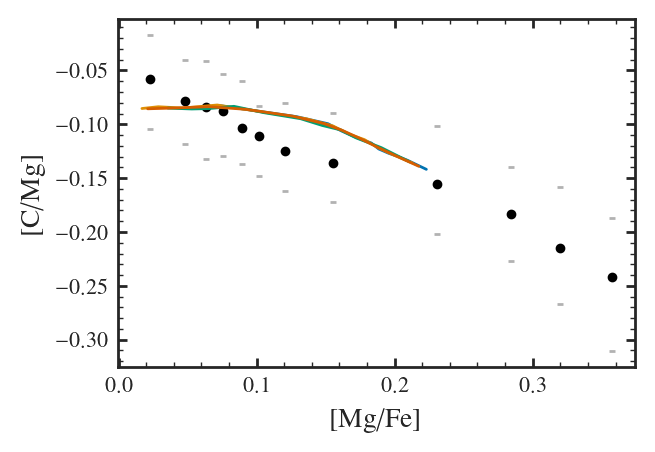

In [26]:
zofeo_models(models, labels)

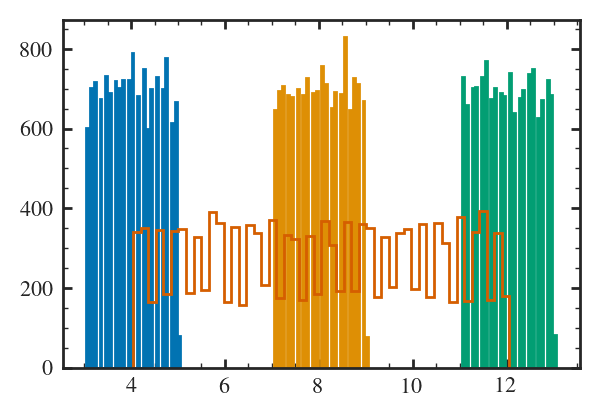

In [27]:
for name, sample in samples.items():
    plt.hist(sample.r_final, histtype="step")

# Conclusions

caafe is entirely unaffected by the samples. 
caah only differs in the metallicity range sampled and the low-metallicity area divergies.